# <center> <font style="color:rgb(100,109,254)">  Building the Harry Potter Invisibility Cloak  </font> </center>


In this notebook, we will built a pretty awesome application which is the harry potter invisibility cloak. Now this one is my favourite one, and the best thing about this is that this was probably the 1st interesting application that I built and secondly I was the first one to create this, and it became so popular that other content creators also came up with this later, among them was also a very popular computer vision blog called LearnOpencv.

### <font style="color:rgb(134,19,348)">  Function:  </font>
This basic function of this application is that it replaces the blanket or cloak with the saved background, now this gives the impression that the cloak is making things invisible.

### <font style="color:rgb(134,19,348)"> Working:   </font>
The working is pretty simple, when the program starts we save the background image, then when the user comes in the frame with the blanket we simply segment the blanket with color, detect the target blanket with contour detection and replace that blanket part with the saved background.

In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

## <font style="color:rgb(134,19,348)">   Finding Color range of target Blanket and saving it  </font>
First and foremost we must find an appropriate color range for our target colored object , this range will be used in `cv2.inrange()` function to filter our object. We will also save our range array as `.npy` in our disk so we can access it later. Below function is the same as we have used in our color models notebook.

In [ ]:
def nothing(x):
    pass
 
cap= cv2.VideoCapture(2,cv2.CAP_DSHOW) 
cap.set(3,1280) 
cap.set(4,720)

cv2.namedWindow("Trackbars")
 
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
 
while True:
    _, frame = cap.read()
    frame = cv2.flip( frame, 1 ) 

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # set the lower and upper range according to the value selected by the trackbar.
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # filter and get the binary mask, where white represents your target color.
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # optionally you can also show the real part of the target color
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack all frames and show it
    stacked = np.hstack((mask_3,frame,res))
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
 
    key = cv2.waitKey(1)
    if key == 27:
        break
        
    if key == ord('s'):
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as harryval.npy
        np.save('media/m12/harryval',thearray)
        break
    
cap.release()
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)"> Maximizing the Detection Mask and Getting rid of the noise   </font>
Now you may have noticed that there is some noise in the above program, this can easily be removed by morphological operations.

In [ ]:
# This variable determines if we want to load color range from memory or use the ones defined in notebook. 
useload = True

# If true then load color range from memory
if useload:
    harryval = np.load('media/m12/harryval.npy')

cap = cv2.VideoCapture(2,cv2.CAP_DSHOW)
cap.set(3,1280) 
cap.set(4,720)

# kernel for morphological operations
kernel = np.ones((5,5),np.uint8)

while(1):
    
    # Take each frame and flip it
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip( frame, 1 )

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # If you're reading from memory then load the upper and lower ranges from there
    if useload:
            lower_range = harryval[0]
            upper_range = harryval[1]
            
    # Otherwise define your own custom values for upper and lower range.
    else:             
       lower_range  = np.array([26,80,147])
       upper_range = np.array([81,255,255])
    
    mask = cv2.inRange(hsv, lower_range, upper_range)
    
    # perform the morphological operations to get rid of the noise
    mask = cv2.erode(mask,kernel,iterations = 1)
    mask = cv2.dilate(mask,kernel,iterations = 2)

   
    res = cv2.bitwise_and(frame,frame, mask= mask)

    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack all frames and show it
    stacked = np.hstack((mask_3,frame,res))
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

## <font style="color:rgb(134,19,348)"> Basic Idea Testing   </font>
Now after having a really good color segmenting scheme, lets move on to the next step. Here we will write some code to our goal at a really basic level. What we will do is take a `star` image as a yellow blanket (extracted with color segmentation) and another image as a background and then replace the star part with the background bit.

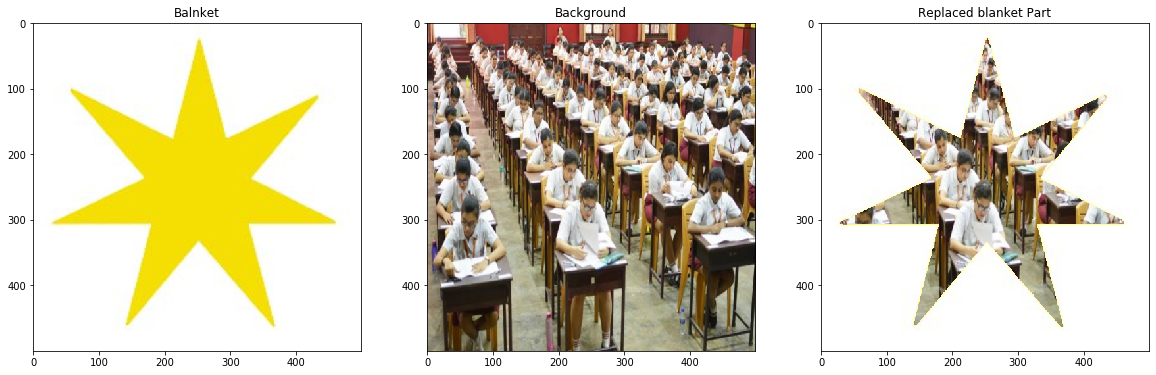

In [74]:
# assume the star image is the banket.
blanket = cv2.imread('media/M12/cstar.jpg',1)
# Aslo read another image as background
background = cv2.imread('media/M12/1classor.jpg',1)

size = 500
 
# Since we're gonna be performing bitwise operations on both, we will make their size equal
blanket = cv2.resize(blanket,(size,size), interpolation = cv2.INTER_LINEAR)
background = cv2.resize(background,(size,size), interpolation = cv2.INTER_LINEAR)

# From the blanket image get the black and white mask and the not mask
blanket_gray = cv2.cvtColor(blanket,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(blanket_gray,234,255,cv2.THRESH_BINARY)  
not_mask = cv2.bitwise_not(mask)

# Combine both images using the masks, in way that the blanket part is replaced by the background part.
img_fg = cv2.bitwise_and(background,background,mask = not_mask)
img_bg = cv2.bitwise_and(blanket,blanket,mask = mask)
combined = cv2.add(img_bg,img_fg)

plt.figure(figsize=[20 ,20])
plt.subplot(131);plt.imshow(blanket[:,:,::-1]);plt.title("Balnket");
plt.subplot(132);plt.imshow(background[:,:,::-1]);plt.title("Background");
plt.subplot(133);plt.imshow(combined[:,:,::-1]);plt.title("Replaced blanket Part");

**One problem with the above method is that in most cases we will not get a single object after color segmentation but multiple objects in which mostly there is noise, this is demonstrated in the below example in which you can assume that after yellow color segmentation we got the a blanket (assume this is the face of below cartoon) and also we got some noise as the tumbs up of this cartoon**

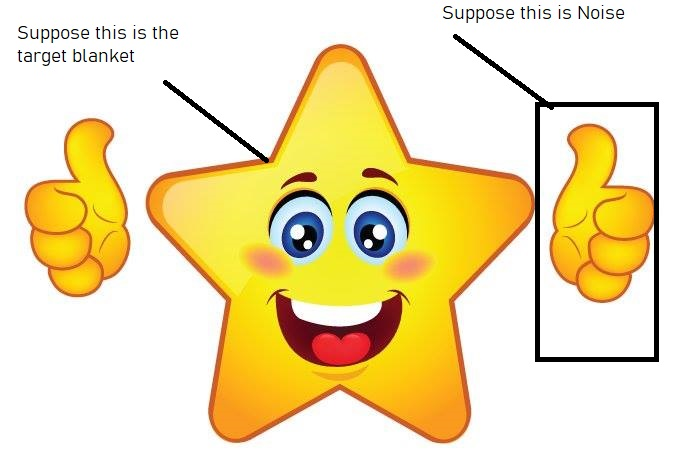

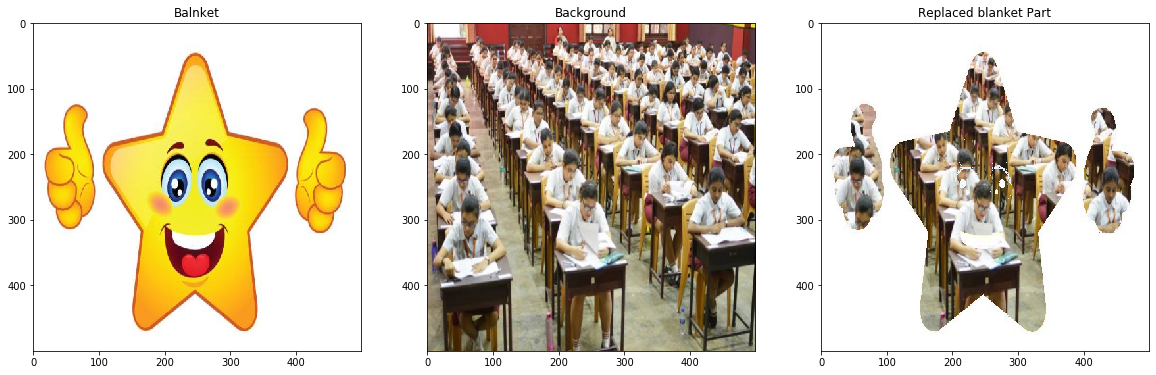

In [75]:
# assume the star image is the banket.
blanket = cv2.imread('media/M12/harryst.jpg',1)
# Aslo read another image as background
background = cv2.imread('media/M12/1classor.jpg',1) 

size = 500
 
# Since we're gonna be performing bitwise operations on both, we will make their size equal
blanket = cv2.resize(blanket,(size,size), interpolation = cv2.INTER_LINEAR)
background = cv2.resize(background,(size,size), interpolation = cv2.INTER_LINEAR)

# From the blanket image get the black and white mask and the not mask
blanket_gray = cv2.cvtColor(blanket,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(blanket_gray,234,255,cv2.THRESH_BINARY)  
not_mask = cv2.bitwise_not(mask)

# Combine both images using the masks, in way that the blanket part is replaced by the background part.
img_fg = cv2.bitwise_and(background,background,mask = not_mask)
img_bg = cv2.bitwise_and(blanket,blanket,mask = mask)
combined = cv2.add(img_bg,img_fg)

plt.figure(figsize=[20 ,20])
plt.subplot(131);plt.imshow(blanket[:,:,::-1]);plt.title("Balnket");
plt.subplot(132);plt.imshow(background[:,:,::-1]);plt.title("Background");
plt.subplot(133);plt.imshow(combined[:,:,::-1]);plt.title("Replaced blanket Part");

## <font style="color:rgb(134,19,348)"> Improving The Idea By Including Contours   </font>
Since the above approach will fail in presence of noise we need a different method that would get rid of the noise and give us the maximum sized segmented object, and we know just the technique, Contour detection.

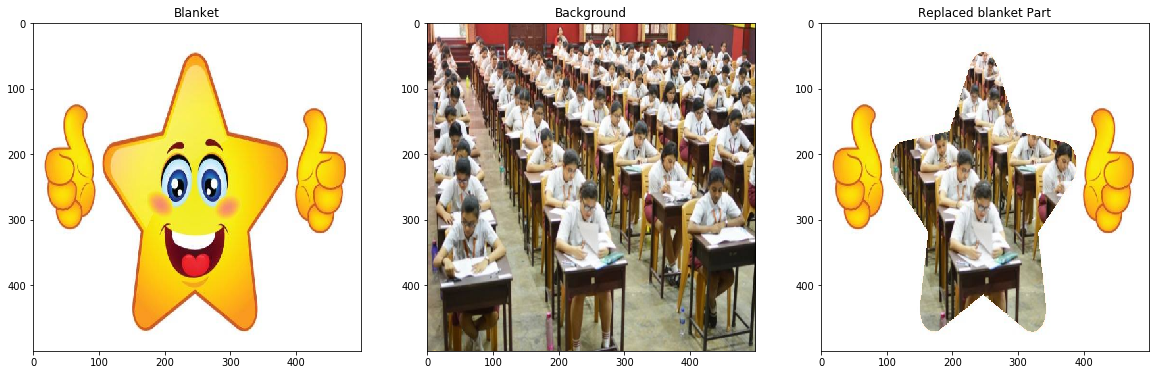

In [76]:
# assume the star image is the banket.
blanket = cv2.imread('media/M12/harryst.jpg',1)
# Aslo read another image as background
background = cv2.imread('media/M12/1classor.jpg',1) 

size = 500
 
# Since we're gonna be performing bitwise operations on both, we will make their size equal
blanket = cv2.resize(blanket,(size,size), interpolation = cv2.INTER_LINEAR)
background = cv2.resize(background,(size,size), interpolation = cv2.INTER_LINEAR)

# From the blanket image get the black and white mask and the not mask
blanket_gray = cv2.cvtColor(blanket,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(blanket_gray,234,255,cv2.THRESH_BINARY_INV)  

# Detect contours
contours,hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Simply a black image of the required size on which we will draw the detected contour
mask_blanket_only = np.zeros(blanket.shape[:2],np.uint8)   

# Get rid of the noise and only extract the target (biggest) contour
c = max(contours, key = cv2.contourArea)

# draw the contour on the black image.
cv2.drawContours(mask_blanket_only, [c], 0, 255, -1) 

img_fg = cv2.bitwise_and(background,background,mask = mask_blanket_only)
img_bg = cv2.bitwise_and(blanket,blanket,mask = cv2.bitwise_not(mask_blanket_only))
combined = cv2.add(img_bg,img_fg)

plt.figure(figsize=[20 ,20])
plt.subplot(131);plt.imshow(blanket[:,:,::-1]);plt.title("Blanket");
plt.subplot(132);plt.imshow(background[:,:,::-1]);plt.title("Background");
plt.subplot(133);plt.imshow(combined[:,:,::-1]);plt.title("Replaced blanket Part");

## <font style="color:rgb(134,19,348)">  Capturing whole Roi to avoid gaps in blanket mask   </font>
Now the above approach is fine and all but in reality when you segment out a blanket it wouldn't be a perfect segmentation and there would be gaps in it, so in order to avoid those gaps we need to approximate the outline instead of drawing the exact outline of the contour, a simple solution is to draw a box around the contour.

imga =    #The problem

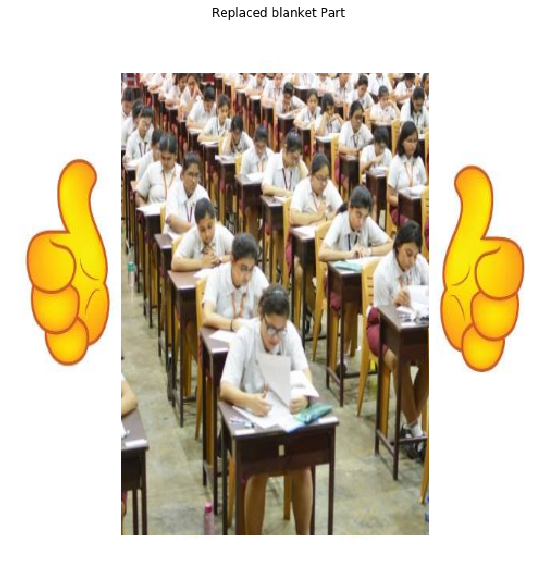

In [77]:
copy = blanket.copy()

# Get a bounding box around the detected contour
x,y,w,h = cv2.boundingRect(c)      
copy[y:y+h, x:x+w ] = background[y:y+h, x:x+w ]

plt.figure(figsize=[10 ,10])
plt.imshow(copy[:,:,::-1]);plt.title("Replaced blanket Part");plt.axis('off');

## <font style="color:rgb(134,19,348)">  Capture only the minimum ROI  </font>

**Now the above approach will work if the blanket is held up like a rectangular shape but other than that, it takes unnecessary space since it doesn't account for rotation, so lets use a rotatable rect function to avoid this problem**

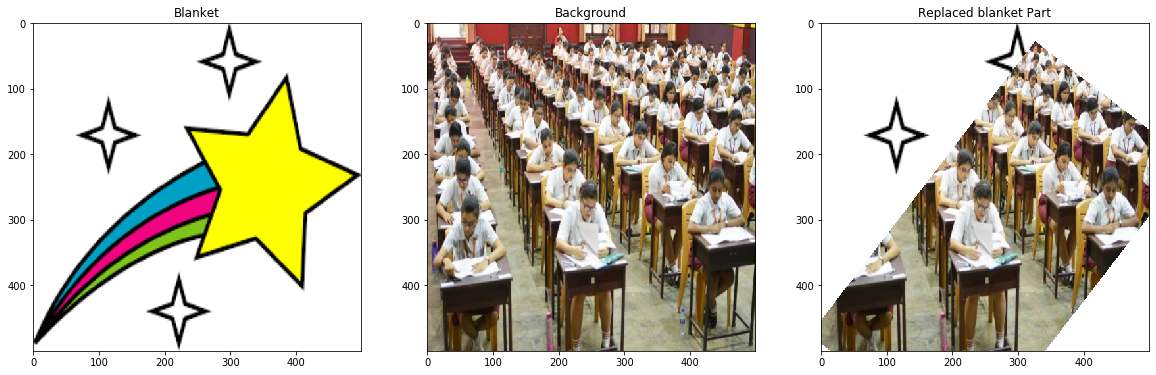

In [78]:
# assume the star image is the banket.
blanket = cv2.imread('media/M12/starshoot.png',1)
# Aslo read another image as background
background = cv2.imread('media/M12/1classor.jpg',1) 

size = 500
 
# Since we're gonna be performing bitwise operations on both, we will make their size equal
blanket = cv2.resize(blanket,(size,size), interpolation = cv2.INTER_LINEAR)
background = cv2.resize(background,(size,size), interpolation = cv2.INTER_LINEAR)

# From the blanket image get the black and white mask and the not mask
blanket_gray = cv2.cvtColor(blanket,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(blanket_gray,234,255,cv2.THRESH_BINARY_INV)  

# Detect contours
contours,hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Simply a black image of the required size on which we will draw the detected contour
mask_blanket_only = np.zeros(blanket.shape[:2],np.uint8)   

# Get rid of the noise and only extract the target (biggest) contour
c = max(contours, key = cv2.contourArea)

# Draw a rotatable rect
rect = cv2.minAreaRect(c)
box =  np.int0(cv2.boxPoints(rect))
cv2.drawContours(mask_blanket_only, [box], -1, 255, -1) 

img_fg = cv2.bitwise_and(background,background,mask = mask_blanket_only)
img_bg = cv2.bitwise_and(blanket,blanket,mask = cv2.bitwise_not(mask_blanket_only))
combined = cv2.add(img_bg,img_fg)

plt.figure(figsize=[20 ,20])
plt.subplot(131);plt.imshow(blanket[:,:,::-1]);plt.title("Blanket");
plt.subplot(132);plt.imshow(background[:,:,::-1]);plt.title("Background");
plt.subplot(133);plt.imshow(combined[:,:,::-1]);plt.title("Replaced blanket Part");

**Now if we had used the normal bounding rect we would have results like below**

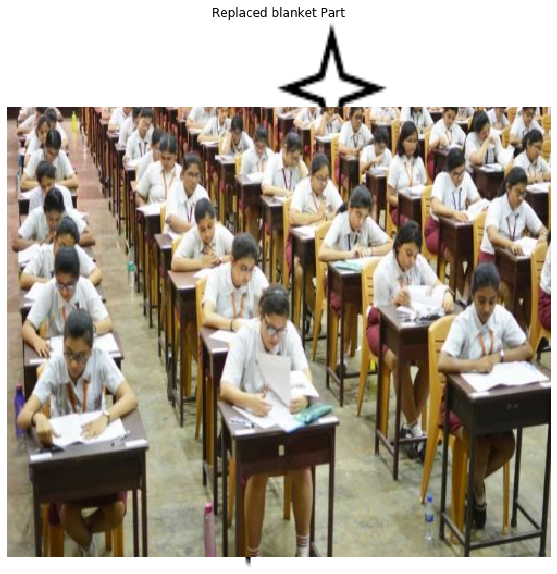

In [79]:
copy = blanket.copy()

# Get a bounding box around the detected contour
x,y,w,h = cv2.boundingRect(c)      
copy[y:y+h, x:x+w ] = background[y:y+h, x:x+w ]

plt.figure(figsize=[10 ,10])
plt.imshow(copy[:,:,::-1]);plt.title("Replaced blanket Part");plt.axis('off');

## <font style="color:rgb(134,19,348)">   Improving the Approach even Further by using Hull </font>
Now the rotatable box approach works for us but its not too good, I mean you always get a rectangular like Roi and with a blanket you want to segment any custom shape that a blanket takes not a rectangular shape, so what we can finally do is use a convex hull around the blanket this will give much better looking results.

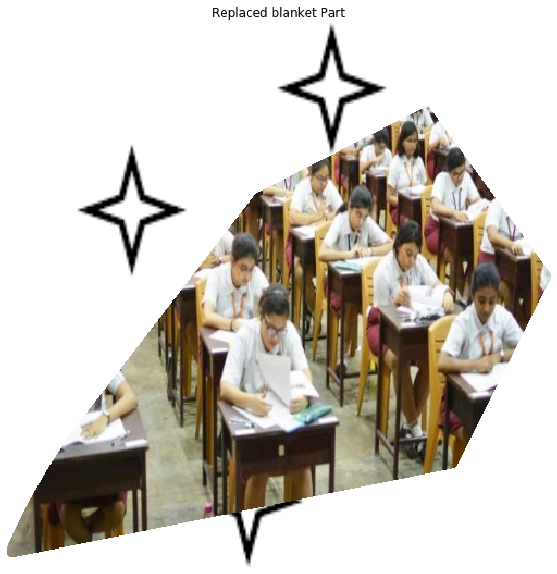

In [80]:
hull = cv2.convexHull(c)
mask_blanket_only = np.zeros(blanket.shape[:2],np.uint8)   


cv2.drawContours(mask_blanket_only, [hull], -1, 255, -1) 
img_fg = cv2.bitwise_and(background,background,mask = mask_blanket_only)
img_bg = cv2.bitwise_and(blanket,blanket,mask = cv2.bitwise_not(mask_blanket_only))
combined = cv2.add(img_bg,img_fg)

plt.figure(figsize=[10 ,10])
plt.imshow(combined[:,:,::-1]);plt.title("Replaced blanket Part");plt.axis('off');

# <font style="color:rgb(134,19,348)">  Harry Potter Cloak  </font>
Finally lets put what we've learned together along with some new required logic and build the cloak. 

In [81]:
useload =True

if useload:
    harryval = np.load('media/M12/harryval.npy')

noise_thresh = 4000

# We will give the user a couple of seconds to get away from the camera in order to save the background
time.sleep(3)  

cap = cv2.VideoCapture(2,cv2.CAP_DSHOW)
cap.set(3,1280)
cap.set(4,720)
# just disabling the autofoucs in my usb cam.
cap.set(cv2.CAP_PROP_AUTOFOCUS, 0)

### Now this piece of code below just gives us more robust background picture

# What we're doing here is that we are averaging around a number of frames instead of just taking a single picture as background
# Also notice we are ignoring the first 50 frames, because a lot of times there is noise in these initial frames.
freshup=80
frames=[]
for i in range(freshup):  
    ret ,frame = cap.read() 
    if i > 50:        
        frames.append(frame.astype('float64'))
        
sumframes= sum(frames) / len(frames)
sumframes = sumframes.astype('uint8')

# Save the final average frame as background, also flip it as we're doing it in the loop too.
background = cv2.flip( sumframes, 1 )    


cv2.namedWindow('Result', cv2.WINDOW_NORMAL)

while(1):
   # try:
        # Take each frame
        _, frame = cap.read()
        frame = cv2.flip( frame, 1 )
        
        kernel = np.ones((5,5),np.uint8)
        
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # If you're reading from memory then load the upper and lower ranges from there
        if useload:
                lower_range = harryval[0]
                upper_range = harryval[1]

        # Otherwise define your own custom values for upper and lower range.
        else:             
           lower_range  = np.array([26,80,147])
           upper_range = np.array([81,255,255])

        mask = cv2.inRange(hsv, lower_range, upper_range)

        # perform the morphological operations to get rid of the noise
        mask = cv2.erode(mask,kernel,iterations = 1)
        mask = cv2.dilate(mask,kernel,iterations = 1)


        contours,hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        # Make sure you have detected some contours and its not noise
        if len(contours) > 0 and cv2.contourArea(max(contours, key = cv2.contourArea)) > noise_thresh:
                   c = max(contours, key = cv2.contourArea)               

                   hull = cv2.convexHull(c)
                    
                   # Optionally you can draw the hull for visualizing
                   #cv2.drawContours(frame, [hull], -1, (0,0,220), 3)
                    
                   mask_blanket_only = np.zeros(frame.shape[:2],np.uint8)
                   
                   # We are dialting the blanket only after extracting its contour.
                   cv2.drawContours(mask_blanket_only,[hull],0,255,-1)
                   #cv2.drawContours(mask_blanket_only,[c],0,255,-1)

                   mask_blanket_only = cv2.dilate(mask_blanket_only,kernel,iterations = 3)

                   img_fg = cv2.bitwise_and(background,background, mask = mask_blanket_only)
                   img_bg = cv2.bitwise_and(frame,frame, mask = cv2.bitwise_not(mask_blanket_only))

                   combined = cv2.add(img_bg,img_fg)
                   cv2.imshow('Result',combined)
                   
                    #You can visualize the mask for debugging
                   #cv2.imshow('mask2',mask_blanket_only)

                
        # if there is no blanket detected then show the original blanket.
        else:
         cv2.imshow('Result',frame)
        
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break


cv2.destroyAllWindows()
cap.release()

###  <font style="color:rgb(34,169,134)"> Assignment: Make Your Own Cloak</font>
Getting this to work well in a difficult environment is challenging enough, so your task is to make this work for you with your own colored blanket or whatever object you use, One thing to note is that the some operations like the correct color range and the iterations in morphological operations for you might be different. 